# TMDB Box office prediction Modeling

## pipeline
### 1. load in data and import packages
### 2. Modeling

## 1. load in data and import packages

In [50]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import collections
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [51]:
file = '/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/1111_train_eda.csv'
df_train = pd.read_csv(file)
file_test = '/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/1111_test_eda.csv'
df_test = pd.read_csv(file_test)
df_train.head(3)

,budget,popularity,runtime,revenue,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_length,...,num_cast,genders_crew_0,genders_crew_1,genders_crew_2,num_crew,release_day,release_month,release_year,release_quarter,release_dayofweek
0,14000000,6.575393,93.0,12314651,0,1,0,0,0,1,...,24,59,0,13,72,20,2,2015,1,4
1,40000000,8.248895,113.0,95149435,1,1,0,0,1,4,...,20,1,4,4,9,6,8,2004,3,4
2,3300000,64.299990,105.0,13092000,1,0,0,0,0,1,...,51,49,4,11,64,10,10,2014,4,4


In [52]:
df_train.columns

Index(['budget', 'popularity', 'runtime', 'revenue', 'genre_Drama',
       'genre_Comedy', 'genre_Thriller', 'genre_Action', 'genre_Romance',
       'genre_length', 'original_language_en', 'comp_Warner Bros.',
       'comp_Universal Pictures', 'comp_Paramount Pictures',
       'comp_Twentieth Century Fox Film Corporation', 'comp_Columbia Pictures',
       'comp_Metro-Goldwyn-Mayer (MGM)', 'comp_New Line Cinema',
       'comp_Touchstone Pictures', 'comp_Walt Disney Pictures',
       'comp_Columbia Pictures Corporation', 'comp_TriStar Pictures',
       'comp_Relativity Media', 'comp_Canal+', 'comp_United Artists',
       'comp_Miramax Films', 'comp_Village Roadshow Pictures',
       'comp_Regency Enterprises', 'comp_ The', 'comp_BBC Films',
       'comp_Dune Entertainment', 'comp_Working Title Films',
       'comp_Fox Searchlight Pictures', 'comp_StudioCanal', 'comp_Lionsgate',
       'comp_DreamWorks SKG', 'comp_Fox 2000 Pictures',
       'comp_Summit Entertainment', 'comp_Hollywood Pic

# 2  Modeling

In [53]:
X = df_train.drop(['revenue'], axis = 1)
y = np.log1p(df_train['revenue'])
X_test = df_test

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2)

In [55]:
import lightgbm as lgb
import eli5

params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbdt",
         "feature_fraction": 0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         "bagging_seed": 11,
         "metric": 'rmse',
         "lambda_l1": 0.2,
         "verbosity": -1}
lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread =4, n_jobs = -1)
lgb_model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_valid, y_valid)], eval_metric = 'rmse', verbose = 1000, early_stopping_rounds = 200)
eli5.show_weights(lgb_model, feature_filter=lambda x: x != '<BIAS>')

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[419]	training's rmse: 1.15077	valid_1's rmse: 1.43365


Weight,Feature
0.4895,budget
0.1871,popularity
0.0565,release_year
0.0353,runtime
0.0349,genders_crew_2
0.0212,genders_cast_2
0.0152,release_day
0.0151,release_dayofweek
0.0144,num_cast
0.0143,release_month


In [56]:
# Print the best parameters found
gridParams = {
    "max_depth": [5,6,7,8],
    "min_data_in_leaf": [15,20,25,30],
    'learning_rate': [0.01,0.005],
    'num_leaves': [15,20,25,30,35,40],
    'boosting_type' : ['gbdt'],
    'objective' : ['regression'],
    'random_state' : [501], # Updated from 'seed'
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4]
    }

grid_search = GridSearchCV(lgb_model, n_jobs=-1, param_grid=gridParams, cv = 3, verbose=5)
grid_search.fit(X_train, y_train)
print('best parameters:', grid_search.best_params_)
print('best score:',grid_search.best_score_)

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 50.0min
[Parallel(n_jobs=-1)]: Done 874 tasks      | elapsed: 63.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 81.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 101.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 122.6min
[Parallel(n_jobs=-1)]: Done 2170 tasks      | elapsed: 140.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 160.3min
[Parallel(n_jobs=-1)]: Done 3034 tasks      | elapsed: 183.4min
/Users/Sue/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWar

best parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.005, 'max_depth': 8, 'min_data_in_leaf': 15, 'num_leaves': 15, 'objective': 'regression', 'random_state': 501, 'reg_alpha': 1, 'reg_lambda': 1.2}
best score: 0.44898868539129255


In [57]:
n_fold = 5
random_seed=2242
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

prediction = np.zeros(X_test.shape[0])
scores = []
feature_importance = pd.DataFrame()
for fold_n, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X.values[train_index], X.values[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
            verbose=500, early_stopping_rounds=200)
            
    y_pred_valid = model.predict(X_valid)
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    scores.append(mean_squared_error(y_valid, y_pred_valid) ** 0.5)
        
    prediction += y_pred    

# feature importance
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = X.columns
    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = fold_n + 1
    feature_importance = pd.concat([feature_importance, fold_importance], axis=0)

prediction /= n_fold
    
print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))

#print(prediction)

Training until validation scores don't improve for 200 rounds
[500]	training's rmse: 1.11112	valid_1's rmse: 1.42074
Early stopping, best iteration is:
[720]	training's rmse: 1.03997	valid_1's rmse: 1.41698
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=0.2, reg_alpha=0.0 will be ignored. Current value: lambda

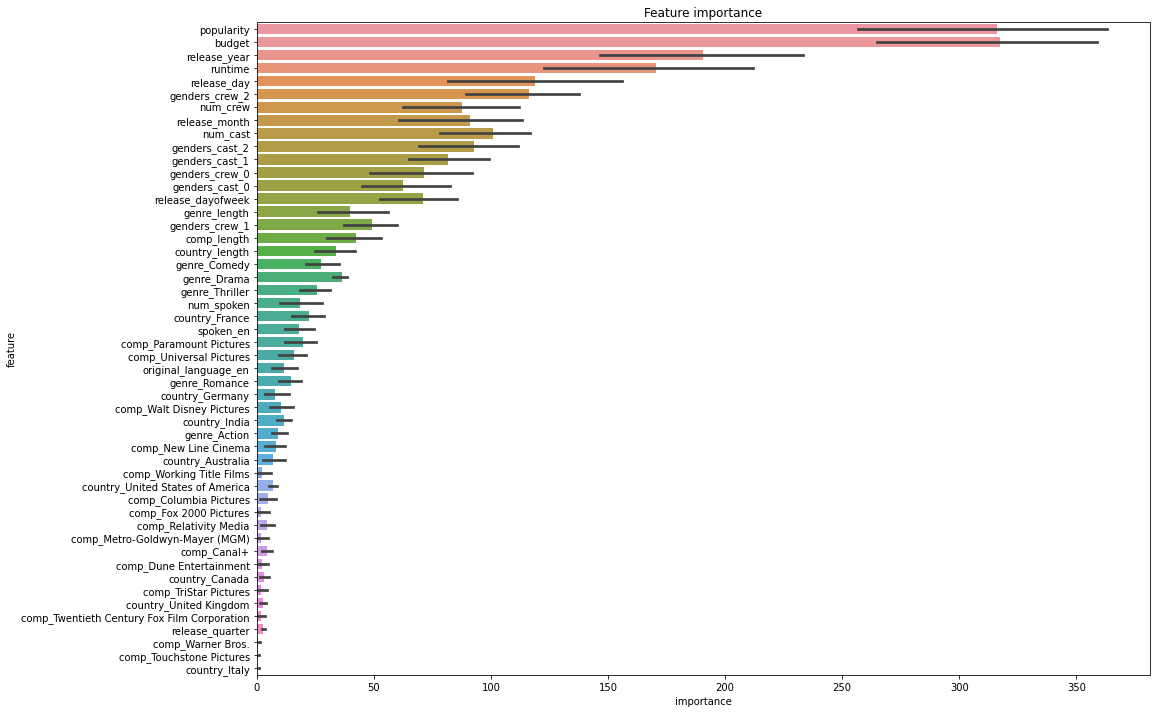

In [58]:
feature_importance['importance'] /= n_fold
cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index

best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
plt.title('Feature importance');

In [59]:
sub = pd.DataFrame()
sub['revenue'] = np.expm1(prediction)
sub.to_csv("/Users/Sue/Documents/2020_study/springboard/capstone_project2_movie/Dataset/tmdb-box-office-prediction/lgb.csv", index=False)

In [60]:
sub

,revenue
0,5.337200e+06
1,3.938873e+07
2,2.126895e+07
3,2.090978e+08
4,1.884249e+05
...,...
2878,7.170446e+08
2879,4.685980e+07
2880,5.008512e+07
2881,3.774239e+07
